In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('exam_result')
df.head()

,a,b,c
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.shape

(100, 3)

In [5]:
df.describe(include='all')

,c1,c2,res
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
c1     100 non-null float64
c2     100 non-null float64
res    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [7]:
df.corr()

,c1,c2,res
c1,1.000000,-0.023665,0.574057
c2,-0.023665,1.000000,0.512323
res,0.574057,0.512323,1.000000


In [8]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
print(X_train.shape)
print(y.shape)
print(X_train.iloc[1][1])

(70, 2)
(70, 1)
-0.5330539718207712


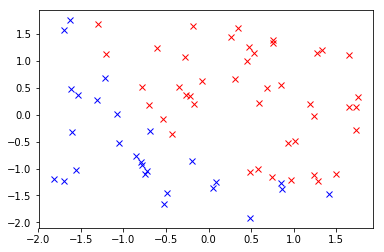

In [9]:
for i in range(X_train.shape[0]):
    if y[i]==1:
        plt.plot(X_train.iloc[i][0],X_train.iloc[i][1],'rx')
        #print("Aa")
    else:
        
        plt.plot(X_train.iloc[i][0],X_train.iloc[i][1],'bx')
plt.show()

In [10]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (70, 2)
y.shape: (70, 1)
m: 70
n: 2
x.shape after appending a column for bias: (70, 3)


In [11]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[ 1.01779293],
        [-0.86542859],
        [-0.60360011]]), (3, 1))

In [12]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [13]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.1963006231708664

# Gradient Descent

In [14]:
alpha = 0.001 # Learning rate
log = np.array([])
while(alpha < 1):
    temp = np.zeros((n+1,1))
    J_prev = 100
    J=0
    w = np.random.randn(n+1,1)
    iterations=0
    while(abs(J_prev-J) > 0.0000010):
        z = np.matmul(x,w)
        h = 1/(1 + np.exp(-z))
        for i in range(n+1):
            temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
        for i in range(n+1):
            w[i,:] = temp[i]
        #print(w)
        #print(np.matmul(h-y,(h-y).T))
        J_prev = J
        w1 = np.log(1/(1 + np.exp(-z)))
        w2 = np.log(1-(1/(1 + np.exp(-z))))
        J = (-1/m)*np.sum(y*w1 + (1-y)*w2)
        #print(J)
        if(alpha == 0.001):
            log = np.append(log, J)
        iterations+=1
    if(alpha == 0.001):
        it = np.arange(iterations)
        w1 = w
    z = np.matmul(X_test,w)
    y_pred = 1/(1 + np.exp(-z))
    i=0
    cnt=0
    for i in range(X_test.shape[0]):
        if( abs(y_pred[i] - y_test[i]) < 0.5):
            cnt = cnt+1
    accuracy = (cnt/y_test.shape[0])*100
    print("alpha = ",alpha," cost = ",J," iterations = ",iterations," accuracy = ",accuracy)
    alpha = alpha*10

alpha =  0.001  cost =  0.24392150162636428  iterations =  37848  accuracy =  93.33333333333333
alpha =  0.01  cost =  0.2201250416576267  iterations =  10449  accuracy =  96.66666666666667
alpha =  0.1  cost =  0.215651574815985  iterations =  2312  accuracy =  96.66666666666667


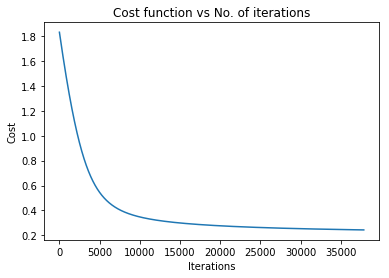

In [15]:
#plot for alpha = 0.001
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

# Using Regularisation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [17]:
df = pd.read_csv('exam_result')
df.head()

,a,b,c
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
x = X_train
y = y_train

In [20]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
#lamda = 25
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (70, 2)
y.shape: (70,)
m: 70
n: 2
x.shape after appending a column for bias: (70, 3)


In [21]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[ 0.52878366],
        [-0.60998485],
        [-0.42627859]]), (3, 1))

In [22]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [23]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.052547787890045

# Gradient descent 

In [24]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
epsilon = 0.0000001
J=0
iterations = 0
while(alpha<1):
    lamda = 10
    #log = np.array([])
    while(lamda < 1001):
        w = np.zeros((n+1,1))
        J_prev = 100
        J=0
        iterations = 0
        while(abs(J_prev-J) > epsilon):
            z = np.matmul(x,w)
            h = 1/(1 + np.exp(-z))
            for i in range(n+1):
                temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0)) - alpha*lamda*(1/m)*w[i,:]
            for i in range(n+1):
                w[i,:] = temp[i]
            #print(w)
            #print(np.matmul(h-y,(h-y).T))
            J_prev = J
            w1 = np.log(1/(1 + np.exp(-z)))
            w2 = np.log(1-(1/(1 + np.exp(-z))))
            J = (-1/m)*np.sum(y*w1 + (1-y)*w2) + (1/(2*m))*lamda*np.sum(np.multiply(w,w))
            #print(J)
            #if(lamda == 1000):
            #    log = np.append(log, J)
            iterations+=1
        z = np.matmul(X_test,w)
        y_pred = 1/(1 + np.exp(-z))
        i=0
        cnt=0
        for i in range(X_test.shape[0]):
            if( abs(y_pred[i] - y_test[i]) < 0.5):
                cnt = cnt+1
        accuracy = (cnt/y_test.shape[0])*100
        print("alpha = ",alpha,"lamda = ",lamda," iterations = ",iterations," cost = ",J," accuracy = ",accuracy)
        lamda = lamda*10
    print("___________")
    alpha = alpha*10

alpha =  0.001 lamda =  10  iterations =  11626  cost =  0.4767071516258037  accuracy =  86.66666666666667
alpha =  0.001 lamda =  100  iterations =  2218  cost =  0.6450548712099519  accuracy =  86.66666666666667
alpha =  0.001 lamda =  1000  iterations =  273  cost =  0.6875822692990526  accuracy =  86.66666666666667
___________
alpha =  0.01 lamda =  10  iterations =  1597  cost =  0.4765488499391411  accuracy =  86.66666666666667
alpha =  0.01 lamda =  100  iterations =  337  cost =  0.6450287102882124  accuracy =  86.66666666666667
alpha =  0.01 lamda =  1000  iterations =  52  cost =  0.6875779623344171  accuracy =  86.66666666666667
___________
alpha =  0.1 lamda =  10  iterations =  252  cost =  0.47653212707779447  accuracy =  86.66666666666667
alpha =  0.1 lamda =  100  iterations =  57  cost =  0.6450239652609154  accuracy =  86.66666666666667
alpha =  0.1 lamda =  1000  iterations =  18  cost =  0.6875774117684367  accuracy =  86.66666666666667
___________


# Conclusion

Minimum cost that we are getting is 0.5074767 for alpha = 0.1 and lamda = 10.
However cost for alpha=0.001 and alpha=0.01 for lamda = 10 is approx 0.507.
Therefore we can deduct that cost is lesser for lamda = 10 as compared to lamda = 100 and 1000.
This means that higher value of lamda is underfitting our model.